<a href="https://colab.research.google.com/github/saikumar28102000/THE-SPARK-FOUNDATION/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science and Business Analytics Intern @ The Sparks Foundation

#GRIP MARCH  2021 

### Author: SAI KUMAR T S

 

### Task 2: Prediction using Unsupervised ML

##### K-means Clustering
Problem Statement: From the given 'iris' dataset, predict the optimum number of clusters and represent it virtually

##### Data Import and Pre-processing

In [ ]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#To show total rows and columns
df.shape

(150, 6)

In [ ]:
# Data Types of Columns
df.dtypes

Id                   int64
SepalLength(cm)    float64
SepalWidth(cm)     float64
PetalLength(cm)    float64
PetalWidth(cm)     float64
Species             object
dtype: object

In [ ]:
# To check any Null Values

df.isnull().sum()

Id                 0
SepalLength(cm)    0
SepalWidth(cm)     0
PetalLength(cm)    0
PetalWidth(cm)     0
Species            0
dtype: int64

In [ ]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details

In [ ]:
# Statistical Details 
df .describe()

,Id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Number of distinct values
df.nunique()

Id                 150
SepalLength(cm)     35
SepalWidth(cm)      23
PetalLength(cm)     43
PetalWidth(cm)      22
Species              3
dtype: int64

In [ ]:
#dropping the id column as it is not required
df.drop('Id',axis=1,inplace=True)

   ### Data Visualization

In [ ]:
# To see the correlation between the variables
df.corr()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
SepalLength(cm),1.000000,-0.109369,0.871754,0.817954
SepalWidth(cm),-0.109369,1.000000,-0.420516,-0.356544
PetalLength(cm),0.871754,-0.420516,1.000000,0.962757
PetalWidth(cm),0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

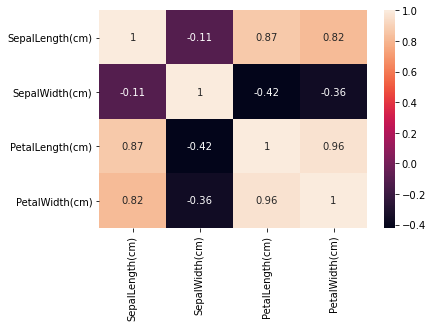

In [ ]:
# Heatmap to see the correlation
sns.heatmap(df.corr(),annot=True)

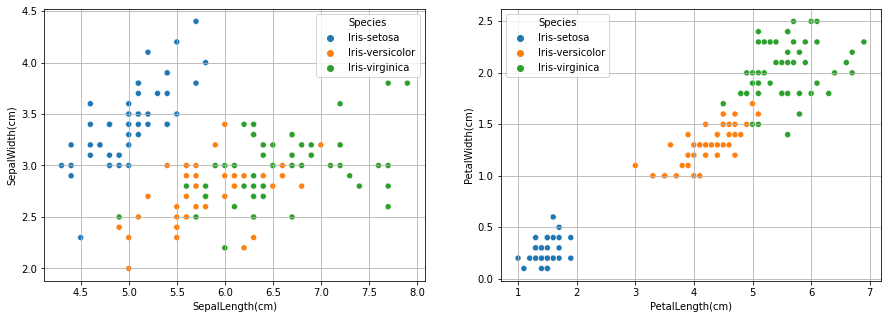

In [ ]:
# scatter plot distribution of Species
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.scatterplot(x=df['SepalLength(cm)'],y=df['SepalWidth(cm)'],hue=df['Species'],data=df)
plt.grid()

plt.subplot(122)
sns.scatterplot(x=df['PetalLength(cm)'],y=df['PetalWidth(cm)'],hue=df['Species'],data=df)
plt.grid()


### Finding optimum number of clusters:

In [ ]:
x=df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []    #within cluster sum of squares helps to find the optimum number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

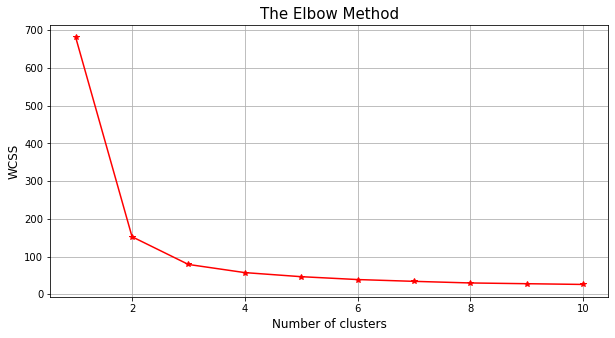

In [ ]:
# Now plotting a graph which shows the 'elbow' i.e. a point after the graph that changes from exponential to linear 
plt.figure(figsize=(10,5))    
plt.plot(range(1, 11), wcss,marker ='*', color='red')
plt.title('The Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('WCSS',fontsize=12) 
plt.grid()
plt.show()

The name 'elbow method ' signifies that the optimum number of clusters can be found where the elbow occurs. This is 
when the WCSS  doesn't decrease significantly with every iteration

Here number of clusters = 3

### Creating the K-means classifier

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
#cluster Centre
centers = kmeans.cluster_centers_
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


##### Visualization of the clusters:

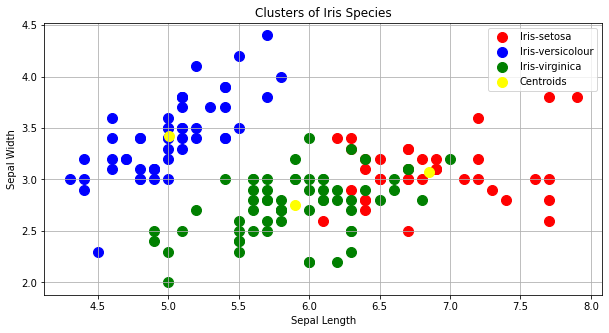

In [ ]:
 #Visualising the clusters (On the first two columns)
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Species',fontsize=12)
plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Sepal Width',fontsize=10)

plt.legend()
plt.grid()
plt.show()

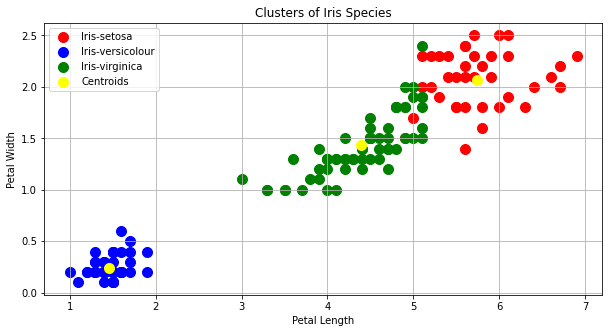

In [ ]:
# Visualising the clusters - On the 3rd and 4th columns
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Species',fontsize=12)
plt.xlabel('Petal Length',fontsize=10)
plt.ylabel('Petal Width',fontsize=10)

plt.legend()
plt.grid()
plt.show()

##### ----------------------